In [1]:
from functions import *

## Expectations

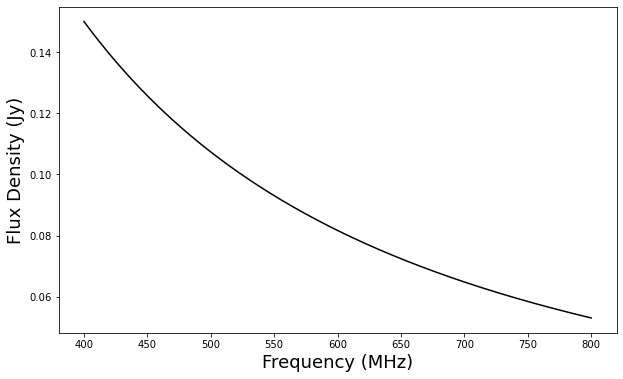

In [21]:
# Spectrum of the pulsar
freqs = np.linspace(800, 400, 1024)
pulsar_spectrum = flux_density(
    freqs, 
    ref_flux = 0.15,
    ref_freq = 400, 
    spectral_index = -1.5
)

fig = plt.figure(figsize=(10,6))
plt.plot(freqs, pulsar_spectrum, color='black')
plt.xlabel('Frequency (MHz)', fontsize=18)
plt.ylabel('Flux Density (Jy)', fontsize=18)
plt.show()

In [29]:
# Load average sky spectrum (SEFD)
sky_data = np.load("./data/calibrated_sky.npz")
sky_array = sky_data["array"]
sky_spectrum = sky_data["spectrum"]
sky_freq_mask = sky_data["freq_mask"]
df = sky_data["freq_bandwidth"]
dt = sky_data["sampling_time"]

In [30]:
# Calibrator spectrum 
freqs = np.linspace(800, 400, 1024)
cal_spectrum = flux_density(freqs)

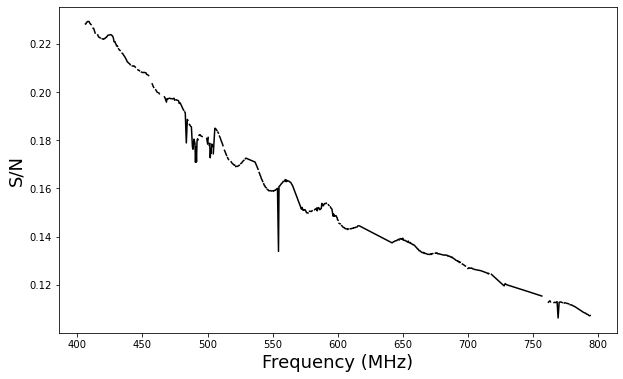

In [31]:
# Given that S/N is proportional to Sv/Ssys * sqrt(N)
N = 1
sn = pulsar_spectrum[sky_freq_mask]/ sky_spectrum[sky_freq_mask] * np.sqrt(dt* df* N)

fig = plt.figure(figsize=(10,6))
plt.plot(freqs[sky_freq_mask], sn, color='black')
plt.xlabel('Frequency (MHz)', fontsize=18)
plt.ylabel('S/N', fontsize=18)
plt.show()

In [38]:
sn_400_1 = sn[-1]
sn_desired = 2
N = np.power(sn_desired/ sn_400_1, 2)
print(f"Number of foldings required to achieve S/N 2: {N}")

Number of foldings required to achieve S/N 2: 77.98680664060242
